In [22]:
import shap
from xgboost import XGBClassifier
from utils.utils import load
import pandas as pd
shap.initjs()

In [2]:
X, y, _, _, = load("data/complete", "RiskPerformance", return_df= True)

<Axes: >

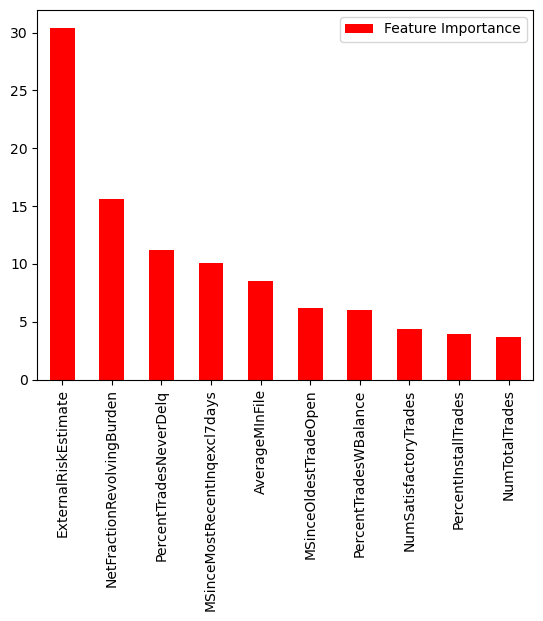

In [24]:
from sklearn.ensemble import RandomForestClassifier

params =  {"n_estimators": 920,
    "criterion": 'entropy',
    "max_depth": 259,
    "min_samples_split": 106,
    "max_features": 'sqrt'}
rf = RandomForestClassifier(**params)
rf.fit(X, y)


<Axes: >

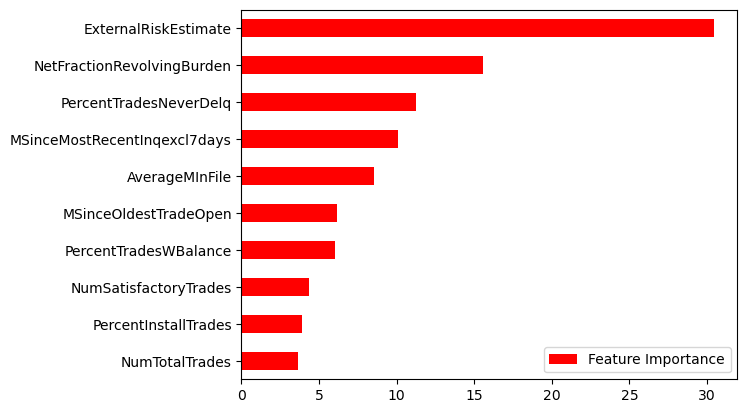

In [36]:
rf_featureImportance= pd.DataFrame({'Feature Importance':rf.feature_importances_*100}, index= X.columns)
rf_featureImportance.sort_values('Feature Importance', ascending=True).plot(kind='barh', color='red')
# rf_featureImportance
# import seaborn as sns
# sns.catplot(kind = "bar", x = rf_featureImportance.index, y = rf_featureImportance["Feature Importance"])

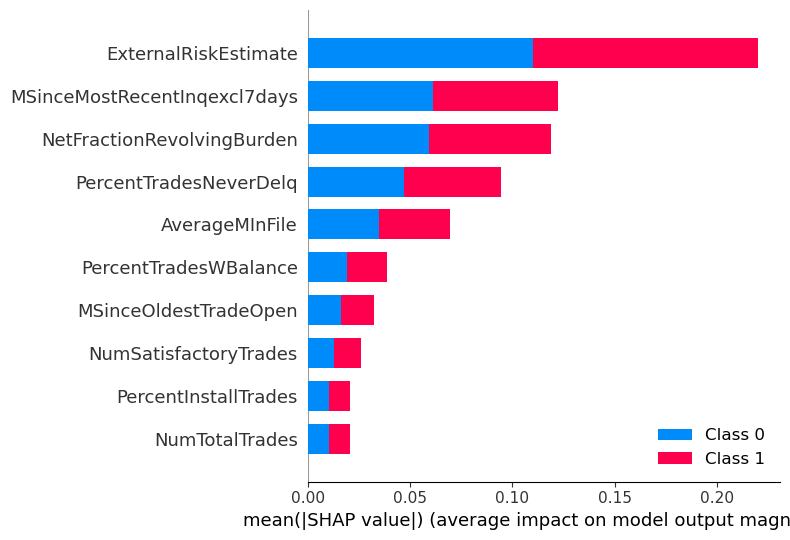

In [26]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)
shap.summary_plot(shap_values, X)


In [3]:
params = {"n_estimators": 706,
    "max_depth": 3,
    "learning_rate": 0.023723506951734197}
model = XGBClassifier(**params)
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.023723506951734197,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=706, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

<Axes: >

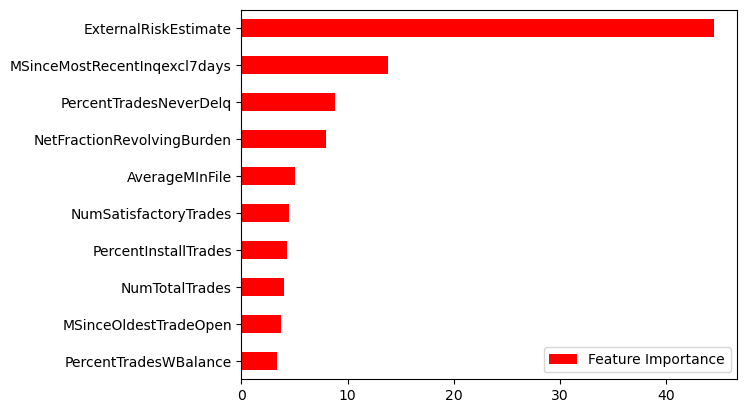

In [40]:
xg_featureImportance= pd.DataFrame({'Feature Importance':model.feature_importances_*100}, index= X.columns)
xg_featureImportance.sort_values('Feature Importance', ascending=True).plot(kind='barh', color='red')

The figure layout has changed to tight


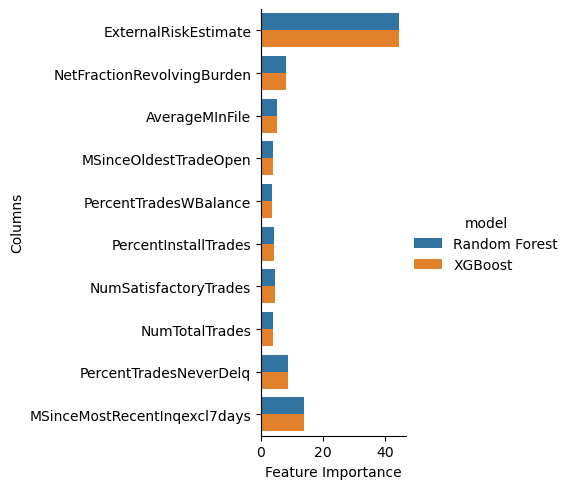

In [51]:
rf_featureImportance["model"] = "Random Forest"
xg_featureImportance["model"] = "XGBoost"
featureImportance = pd.concat((rf_featureImportance, xg_featureImportance))
featureImportance = featureImportance.reset_index().rename(columns={"index": "Columns"})
sns.catplot(featureImportance, kind = "bar", y = "Columns", x = "Feature Importance", hue = "model", orient = "h")

In [20]:
explainer = shap.TreeExplainer(model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.force( shap_values[0], X.iloc[0, :])

[16:10:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


In [10]:
# visualize the training set predictions
shap.plots.force(shap_values)

shap.plots.force is slow for many thousands of rows, try subsampling your data.


No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


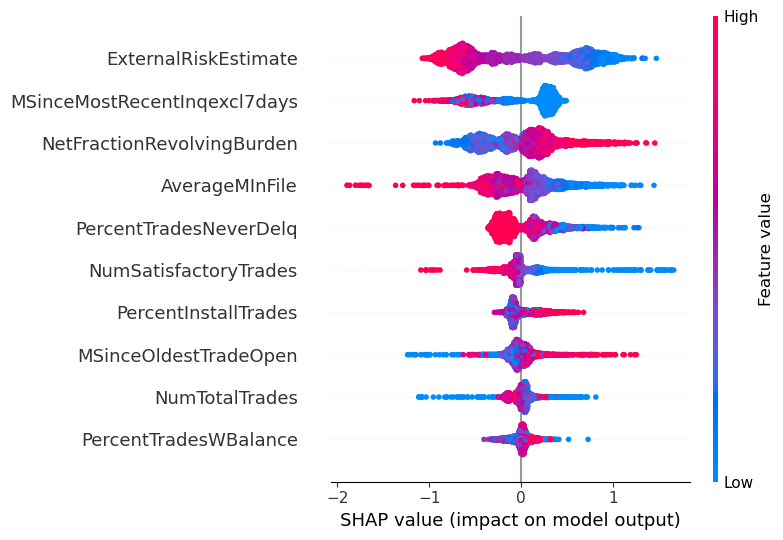

In [5]:
shap.summary_plot(shap_values, X)

# Save XGBOOST

In [54]:
from cleaning_data.DataPipeline import PipelineCV
from utils_parameter_search.dataset_params import datasets
pipeline= PipelineCV("RiskPerformance", **datasets["complete"])
params = {"n_estimators": 706,
    "max_depth": 3,
    "learning_rate": 0.023723506951734197}
model = XGBClassifier(**params)


In [67]:
df = pd.read_csv("FICO_Dataset.csv", sep = ";")
columns = list(df.columns)
columns.remove("RiskPerformance")
columns
y = df["RiskPerformance"]
X = df[columns]
X, y =  pipeline.fit_transform(X, y)
model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.023723506951734197,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=706, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [69]:
import pickle


with open("final_model/pipeline", "wb") as fh:
    pickle.dump(pipeline,fh)
with open("final_model/model", "wb") as fh:
    pickle.dump(model, fh)